In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

# Definizioni

In [43]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 53.5 V

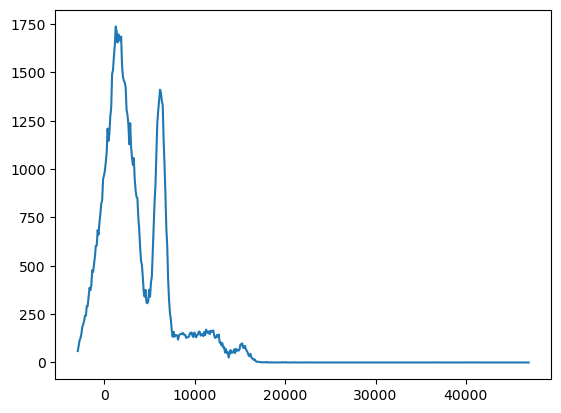

In [53]:
#leggo il file dalla riga 66 in poi, escludendo il testo e il nome delle colonne
df = pd.read_csv('~/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro CsI/Na_53.5_th-20.txt', delim_whitespace = 'true',  skiprows = 65, encoding='ISO-8859-1', header = None)
df.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
plt.plot(df['ADC'], df['counts'])

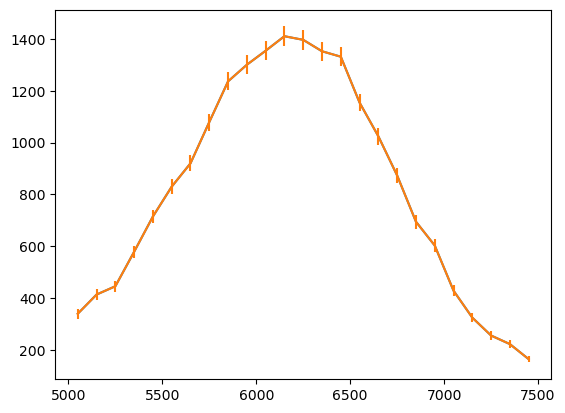

In [44]:
#seleziono dati del primo picco
# Definisco gli indici delle righe copiate
start_index =80  # Indice di inizio (inclusivo)
end_index = 105   # Indice di fine (esclusivo)
# Copio le righe selezionate in un nuovo dataframe
df_filtrato = df.iloc[start_index:end_index]
x_primo_picco = df_filtrato['ADC']
y_primo_picco = df_filtrato['counts']
plt.plot(x_primo_picco, y_primo_picco)
errori_counts = np.array(np.sqrt(df_filtrato['counts']))
plt.errorbar(x_primo_picco, y_primo_picco, yerr=errori_counts, label='Data')
#print (errori_counts)
errori_counts1 = np.array(np.sqrt(df['counts']))

In [11]:
least_squares = LeastSquares(df_filtrato['ADC'], df_filtrato['counts'], errori_counts, gauss)
my_minuit = Minuit(least_squares, mu = 6157, sigma = 640, a = 1350 ) #inserire variabili della funzione inizializzate necessariamente presenti in entrata alla funzioneb=0.01
my_minuit.limits['a'] = (0, None) #condizioni
# print("Parameters:", my_minuit.parameters)
# print("Values:", my_minuit.values)
# print("Errors:", my_minuit.errors)
MinimumLQ = my_minuit.migrad () #minimo funzione LQ
Errors_param = my_minuit.hesse () #incertezze
fit_valid = my_minuit.valid #controllo fit
Q_squared = my_minuit.fval #valore Q-quadro
N_dof = my_minuit.ndof #gradi di libertà
p_value = 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof) #p valore
Q_squared_calc = 0. #calcolo esplicito del Q_quadro
print ('success of the fit: ', fit_valid)
print ('value of the fit Q-squared', Q_squared)
print ('value of the number of degrees of freedom', N_dof)
print ('associated p-value: ', p_value)
display(my_minuit)
#print  (my_minuit)


success of the fit:  True
value of the fit Q-squared 55.75437590147089
value of the number of degrees of freedom 22.0
associated p-value:  9.271887723560912e-05


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 55.75 (χ²/ndof = 2.5)      │              Nfcn = 77               │
│ EDM = 4.38e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  6.151e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    611    │     5     │            │            │         │         │       │
│ 2 │ a     │  1.391e3  │  0.013e3  │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  24.3    -5     7 │
│ sigma │    -5  23.1   -41 │
│     a │     7   -41   168 │
└───────┴───────────────────┘

In [12]:
least_squares = LeastSquares(df['ADC'], df['counts'], errori_counts1, gauss)
my_minuit = Minuit(least_squares, mu = 6157, sigma = 640, a = 1350 ) #inserire variabili della funzione inizializzate necessariamente presenti in entrata alla funzioneb=0.01
my_minuit.limits['a'] = (0, None) #condizioni
# print("Parameters:", my_minuit.parameters)
# print("Values:", my_minuit.values)
# print("Errors:", my_minuit.errors)
MinimumLQ = my_minuit.migrad () #minimo funzione LQ
Errors_param = my_minuit.hesse () #incertezze
fit_valid = my_minuit.valid #controllo fit
Q_squared = my_minuit.fval #valore Q-quadro
N_dof = my_minuit.ndof #gradi di libertà
p_value = 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof) #p valore
Q_squared_calc = 0. #calcolo esplicito del Q_quadro
print ('success of the fit: ', fit_valid)
print ('value of the fit Q-squared', Q_squared)
print ('value of the number of degrees of freedom', N_dof)
print ('associated p-value: ', p_value)
display(my_minuit)
#print  (my_minuit)


success of the fit:  False
value of the fit Q-squared nan
value of the number of degrees of freedom 497.0
associated p-value:  nan


/usr/lib/python3/dist-packages/iminuit/cost.py:129: RuntimeWarning: divide by zero encountered in divide
  z = (y - ym) / ye
/usr/lib/python3/dist-packages/iminuit/cost.py:129: RuntimeWarning: invalid value encountered in divide
  z = (y - ym) / ye


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = nan                        │              Nfcn = 320              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  6.157e3  │    nan    │            │            │         │         │       │
│ 1 │ sigma │   6.4e2   │    nan    │            │            │         │         │       │
│ 2 │ a     │  1.35e3   │    nan    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │   nan   nan   nan │
│ sigma │   nan   nan   nan │
│     a │   nan   nan   nan │
└───────┴───────────────────┘

# 54.5 V

<ErrorbarContainer object of 3 artists>

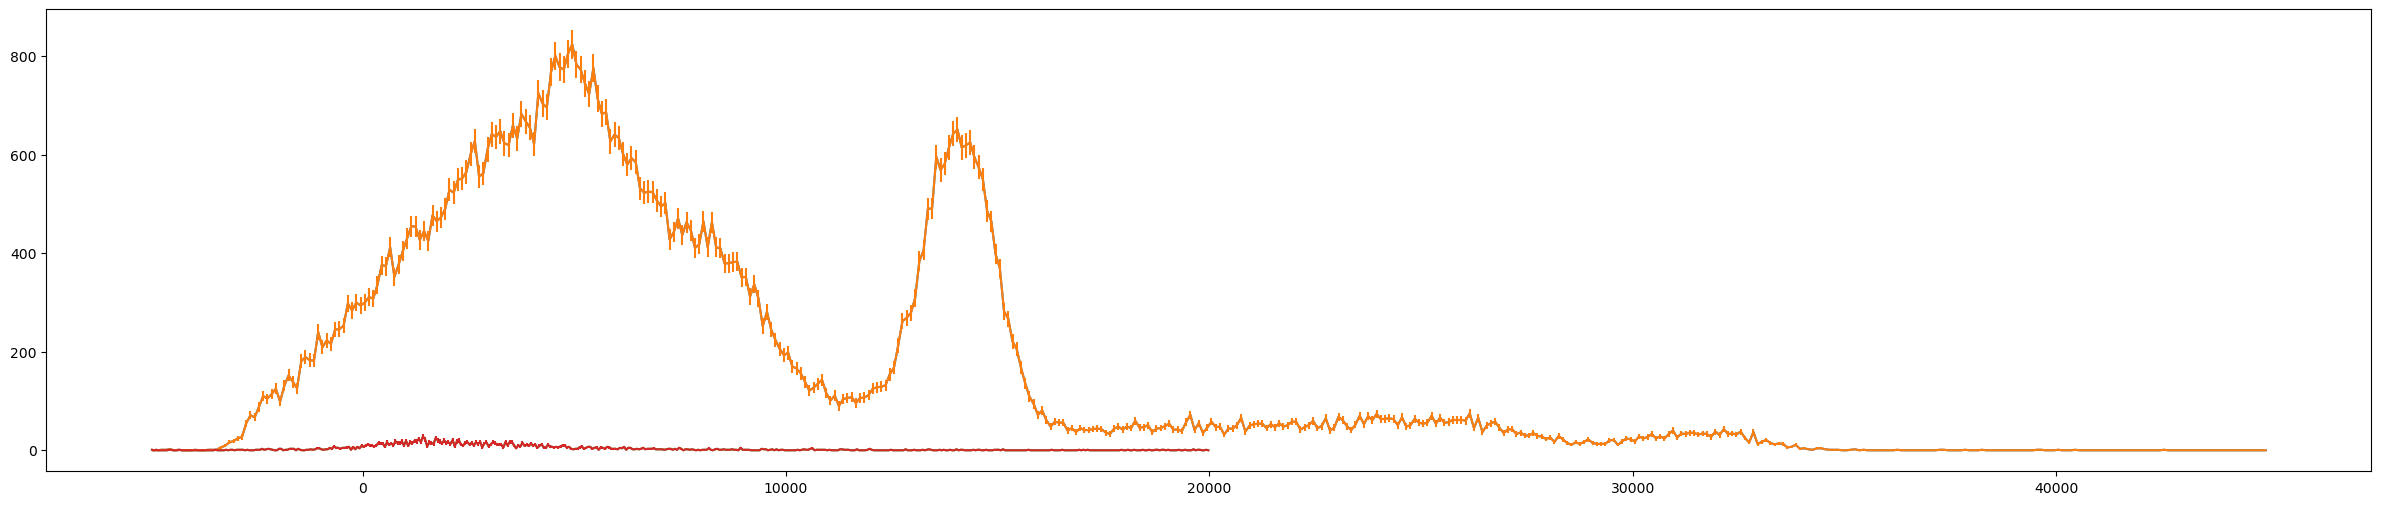

In [ ]:
#importo prima il file di dati + fondo, poi quello solo fondo e faccio la sottrazione dei due plot
df54 = pd.read_csv('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro CsI/Na_54.5_th-20.txt', delim_whitespace= 'True', skiprows = 1, encoding='ISO-8859-1', header = None)
df54.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_54 = np.array(np.sqrt(df54['counts']))
df54_bkg = pd.read_csv('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro CsI/Bg_54.5_th-20.txt', delim_whitespace= 'True', skiprows = 65, encoding='ISO-8859-1', header = None)
df54_bkg.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_54_bkg = np.array(np.sqrt(df54_bkg['counts'][:500]))
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df54['ADC'], df54['counts'])
plt.errorbar(df54['ADC'], df54['counts'], yerr=err_counts_54)
plt.plot(df54_bkg['ADC'][:500], df54_bkg['counts'][:500])
plt.errorbar(df54_bkg['ADC'][:500], df54_bkg['counts'][:500], yerr=err_counts_54_bkg)

In [22]:
print (len(df54_bkg['ADC']), len(df54['ADC']))

1200 500


<ErrorbarContainer object of 3 artists>

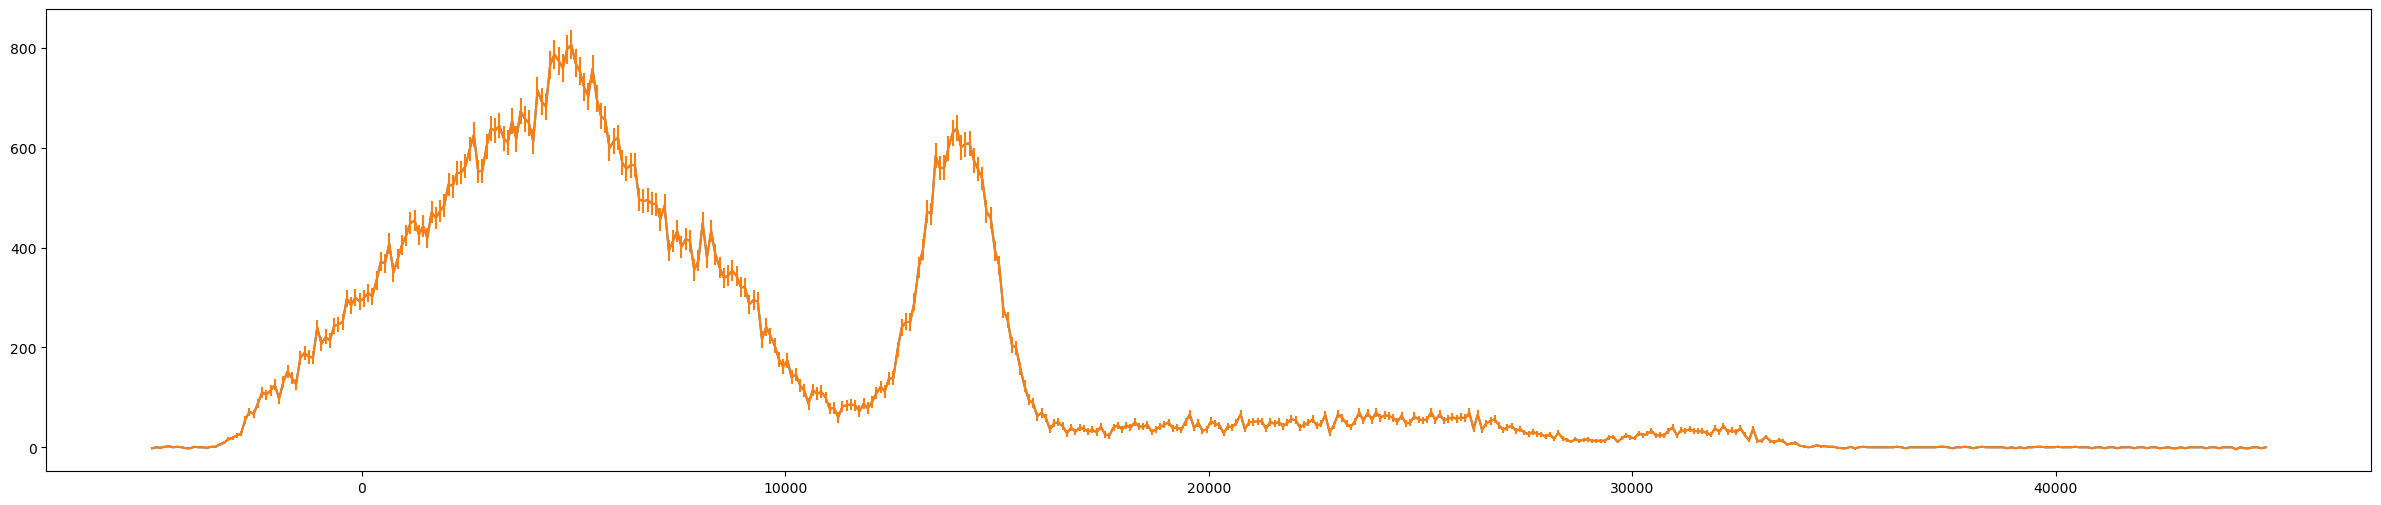

In [33]:
#provo a sottrarre i due daataframe e vedo cosa ne esce
y_54_no_bkg = []
err_y_54 = []
for i in range (500):
    y_54_no_bkg.append( df54['counts'][i] - df54_bkg['counts'][i])
    err_y_54.append(math.sqrt(err_counts_54[i]**2 + err_counts_54_bkg[i]**2))
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df54['ADC'], y_54_no_bkg)
plt.errorbar(df54['ADC'], y_54_no_bkg, yerr=err_y_54, label='Data')


# 55.5

<ErrorbarContainer object of 3 artists>

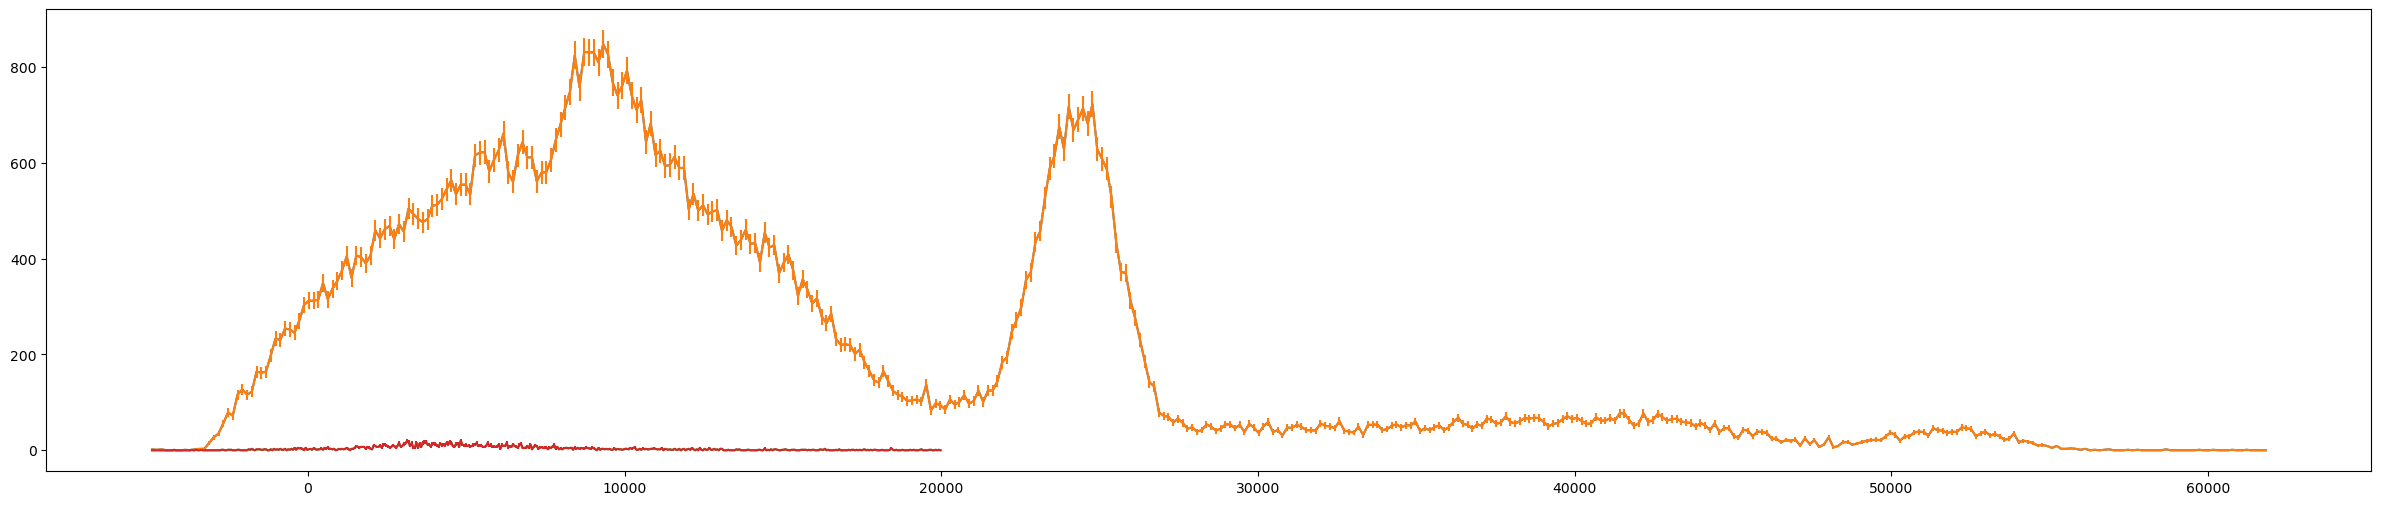

In [51]:
df55 = pd.read_csv('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro CsI/Na_55.5_th-20.txt', delim_whitespace= 'True', skiprows = 1, encoding='ISO-8859-1', header = None)
df55.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_55 = np.array(np.sqrt(df55['counts']))
df55_bkg = pd.read_csv('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro CsI/Bg_55.5_th-20.txt', delim_whitespace= 'True', skiprows = 166, encoding='ISO-8859-1', header = None)   
df55_bkg.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_55_bkg = np.array(np.sqrt(df55_bkg['counts']))
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df55['ADC'], df55['counts'])
plt.errorbar(df55['ADC'], df55['counts'], yerr=err_counts_55)
plt.plot(df55_bkg['ADC'], df55_bkg['counts'])
plt.errorbar(df55_bkg['ADC'], df55_bkg['counts'], yerr=err_counts_55_bkg)

In [52]:
print(len(df55['ADC']), len(df55_bkg['ADC']))

446 499
